# dim_red

> Fill in a module description here

In [ ]:
#| default_exp dim_red

In [ ]:
#| hide
from nbdev.showdoc import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text
from sklearn.decomposition import PCA

In [ ]:
#| export
def normalize_dataframe(in_df):
    sc = StandardScaler()
    return pd.DataFrame(sc.fit_transform(in_df),
                        index=in_df.index, 
                        columns=in_df.columns)

In [ ]:
#| export
def plot_mds_columns(in_df, colors, color_to_label):
    # Normalize the input DataFrame
    normalized_df = normalize_dataframe(in_df)

    # Perform MDS on the transposed DataFrame (to analyze columns)
    mds = MDS(n_components=2)
    mds_transformed_columns = mds.fit_transform(normalized_df.T)

    # Create a scatter plot of the MDS-transformed column coordinates
    fig, ax = plt.subplots(figsize=(4, 4))
    for i, color in enumerate(colors):
        ax.scatter(mds_transformed_columns[i, 0], mds_transformed_columns[i, 1],
                   alpha=0.8, c=color, marker='D')

    # Add column labels
    texts = []
    for i, column_name in enumerate(in_df.columns):
        texts.append(ax.text(mds_transformed_columns[i, 0], mds_transformed_columns[i, 1], 
                             column_name, fontsize=12, color='darkslategray'))

    # Adjust the text labels to avoid overlaps
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

    # Create legend
    legend_elements = [plt.Line2D([0], [0], linestyle='', marker='D', color=color, label=label, markersize=8)
                       for color, label in color_to_label.items()]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    # Set plot labels and title
    ax.set_xlabel('MDS Dimension 1', fontsize=10)
    ax.set_ylabel('MDS Dimension 2', fontsize=10)
    ax.set_title('MDS plot of columns', fontsize=12)

    # Customize axis spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Show the plot
    plt.show()

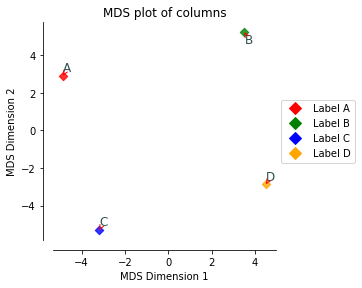

In [ ]:
sample_data = np.random.rand(50, 4)
sample_columns = ['A', 'B', 'C', 'D']
sample_index = range(50)
sample_df = pd.DataFrame(sample_data, columns=sample_columns, index=sample_index)
colors = ['red', 'green', 'blue', 'orange']
color_to_label = {'red': 'Label A', 'green': 'Label B', 'blue': 'Label C', 'orange': 'Label D'}

plot_mds_columns(sample_df, colors, color_to_label)


In [ ]:
#| export
def plot_pca_columns(in_df, colors, color_to_label):
    # Normalize the input DataFrame
    normalized_df = normalize_dataframe(in_df)

    # Perform PCA on the transposed DataFrame (to analyze columns)
    pca = PCA(n_components=2)
    pca_transformed_columns = pca.fit_transform(normalized_df.T)

    # Create a scatter plot of the PCA-transformed column coordinates
    fig, ax = plt.subplots(figsize=(4, 4))
    for i, color in enumerate(colors):
        ax.scatter(pca_transformed_columns[i, 0], pca_transformed_columns[i, 1],
                   alpha=0.8, c=color, marker='D')

    # Add column labels
    texts = []
    for i, column_name in enumerate(in_df.columns):
        texts.append(ax.text(pca_transformed_columns[i, 0], pca_transformed_columns[i, 1], 
                             column_name, fontsize=12, color='darkslategray'))

    # Adjust the text labels to avoid overlaps
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

    # Create legend
    legend_elements = [plt.Line2D([0], [0], linestyle='', marker='D', color=color, label=label, markersize=8)
                       for color, label in color_to_label.items()]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    # Set plot labels and title
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)', fontsize=10)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}%)', fontsize=10)
    ax.set_title('PCA plot of columns', fontsize=12)

    # Customize axis spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Show the plot
    plt.show()


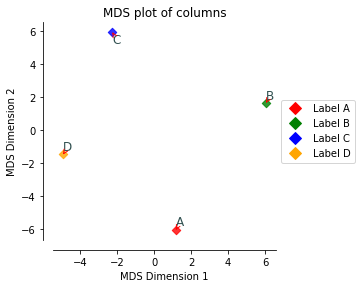

In [ ]:
sample_data = np.random.rand(50, 4)
sample_columns = ['A', 'B', 'C', 'D']
sample_index = range(50)
sample_df = pd.DataFrame(sample_data, columns=sample_columns, index=sample_index)
colors = ['red', 'green', 'blue', 'orange']
color_to_label = {'red': 'Label A', 'green': 'Label B', 'blue': 'Label C', 'orange': 'Label D'}
plot_mds_columns(sample_df, colors, color_to_label)

In [ ]:
#| export
def top_n_rows_driving_columns(df, column_1, column_2, component=0, n=5, direction='togheter'):
    # Normalize the DataFrame
    normalized_df = normalize_dataframe(df)

    # Perform PCA on the normalized DataFrame
    pca = PCA(n_components=2)
    pca_transformed_data = pca.fit_transform(normalized_df)

    # Find the weights of the two columns in the principal components
    column_1_weights = pca.components_[:, df.columns.get_loc(column_1)]
    column_2_weights = pca.components_[:, df.columns.get_loc(column_2)]

    # Calculate the scores of the rows (samples) in the reduced-dimensional space
    row_scores = pca_transformed_data @ np.column_stack((column_1_weights, column_2_weights)).T


    # Find the top n samples that drive the two specified columns closer together in the specified component
    if direction=='togheter':
        top_samples_indices = row_scores[:, component].argsort()[:n]
    # Find the top n samples that drive the two specified columns apart in the specified component
    else:
        top_samples_indices = row_scores[:, component].argsort()[-n:][::-1]
    # Get the row IDs corresponding to the top samples
    top_sample_ids = df.index[top_samples_indices].tolist()

    return top_sample_ids  

In [ ]:
sample_data = np.random.rand(50, 4)
sample_columns = ['A', 'B', 'C', 'D']
sample_index = range(50)
sample_df = pd.DataFrame(sample_data, columns=sample_columns, index=sample_index)
print(top_n_rows_driving_columns(sample_df, 'A', 'B', component=0, n=3, direction='apart'))
print(top_n_rows_driving_columns(sample_df, 'A', 'B', component=0, n=3, direction='togheter'))

[31, 40, 13]
[9, 19, 27]


In [ ]:
#filtered_quantification.tail(50)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()